
<html>
<div style="text-align: center">  
  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQNHiZVrHwvzG2HDN1r2HVWULoIU80_zOnXg&usqp=CAU" width=260px style="padding:10px; text-align: left;"/> </div>


    
    

<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 170, 141, 220 )); width: auto; text-align: center; height: 40px; margin: 10px;">
<h1 style="font-family: Georgia; color: black;">AI - Project2: Reinforcement Learning</h1>
</div>

<div style=" background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  )); width: 400px; height: 30px; margin: 10px; text-alighn:middle">
  <span style="font-family: Georgia; font-size:15pt; color: black ; vertical-align: left;">Shahzad Momayez </span>
    
</div>
    
<div style=" background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  )); width: 400px; height: 30px; margin:10px 10px; text-alighn:middle">
  <span style="font-family: Georgia; font-size:12pt; color:black ; vertical-align: left;">Student Id: 810100272</span>
    
</div>
</html>


# GOAL:
    the goal of this project is to use RL in some problems. using VI, PI , q-learning algorithm.
 # Purpose :
 Frozen Lake Theme: It consists of crossing a frozen lake from start house to house without falling into any holes by moving on the lake. The perimeter of the lake is a 4x4 table. At any time, the agent can choose one of the four left (0), down (1), right (2) and up (3) movements. Of course, note that in the boundary conditions, if the illegal movement is selected, the agent remains in place. The agent gets a +1 bonus for reaching the target's house and a 0 bonus for falling into a hole or moving through a lake.

# Artificial Intelligence Course - Fall 1402
## Computer Assignment #2 - Reinforcement Learning

# Table of Contents

- [Part 1: Value Iteration & Policy Iteration Algorithms](#1)
    - [َQuestion 1:](#1-0)
    - [َQuestion 2:](#1-1)
    - [َQuestion 3:](#1-12)
    - [َQuestion 4:](#1-2)
    - [َQuestion 5:](#1-3)
        - [Value Iteration](#1-3-1)
        - [Policy Iteration](#1-3-2)
    - [َQuestion 6:](#1-4)
        - [Value Iteration](#1-4-1)
        - [Policy Iteration](#1-4-2)
- [Part 2: Q-Learning Algorithm](#2)
    - [َQuestion 7:](#2-1)
    - [َQuestion 8:](#2-2)
    - [َQuestion 9:](#2-3)
    - [َQuestion 10:](#2-4)

In [22]:
# import
import numpy as np
import gym
import matplotlib.pyplot as plt
from tabulate import tabulate

<a name='1'></a>
## Part 1: Value Iteration & Policy Iteration Algorithms

In [23]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False , render_mode = "human" )

In [24]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
env.reset()
env.render()

you can see the environment in each step by render command :


In [25]:
# Total no. of states
env.observation_space.n

16

In [26]:
# Total no. of actions
env.action_space.n

4

<a name='1-0'></a>
### Question 1:

The Value Iteration algorithm is a dynamic programming algorithm used to solve Markov Decision Processes (MDPs) and determine the optimal policy. It is an iterative algorithm that finds the optimal value function and policy by iteratively updating the estimated values of states until convergence.

Here is a high-level overview of the Value Iteration algorithm:

- Initialize the value function V(s) for all states s.

- Iterate until convergence:

- For each state s, calculate the action values Q(s, a) for all possible actions a using the current value function.
- Update the value function for the state as V(s) = max(Q(s, a)) over all possible actions a.
- Once the iterations converge (i.e., the change in value function becomes small), the optimal value function V*(s) is obtained.

- Compute the optimal policy by selecting the action a with the highest action value Q(s, a) for each state s.

- The algorithm repeats steps 2 and 3 until the values converge to their optimal values. It ensures that the value function converges to the maximum achievable value for each state, and the corresponding policy is the optimal policy.

- The key idea behind Value Iteration is the Bellman's optimality equation, which states that the value of a state is equal to the maximum expected immediate reward plus the discounted value of the next state. By iteratively applying this equation, the algorithm progressively refines the value function until it converges to the optimal values.

The optimal policy is derived from the optimal value function by selecting the action that maximizes the action value for each state. Once the iterations converge, the resulting action choices for each state form the optimal policy.


bellman:
$${ V(s) = \max_a \sum_{s'} T(s, a, s')[R(s, a, s') + \gamma V(s')] }$$


<a name='1-1'></a>
### Question 2:

In [27]:
class ValueIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.step=0
    def value_estimation(self):
        self.delta = np.inf

        while(self.delta > self.theta):
            self.step+=1
            self.delta = 0

            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                for action in range(self.env.action_space.n):
                    action_value = 0
                    for probability, next_state, reward, done in self.env.P[state][action]:
                        ### START CODE HERE ###
                         action_value += probability * (reward + self.discount_factor * self.state_values[next_state])
                        ### END CODE HERE ###
                    self.q_values[state, action] = action_value

                self.state_values[state] = np.max(self.q_values[state,:])

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

#                 if (self.delta < self.theta):
#                     break

    def take_action(self, action):
        next_state, reward, done , x , y = self.env.step(action)
        return (next_state, reward, done)

    def get_optimal_policy(self, state):
        return np.argmax(self.q_values[state,:])

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values
    
    def get_step(self):
        return self.step

    def reset(self):
        initial_state , _ = self.env.reset()
        return initial_state

<a name='1-12'></a>
### Question 3:





The Policy Iteration algorithm is another dynamic programming algorithm used to solve Markov Decision Processes (MDPs) and determine the optimal policy. It alternates between the policy evaluation step and the policy improvement step until the optimal policy is obtained.

Here is an overview of the Policy Iteration algorithm:

Initialize an arbitrary policy π(s) for all states s.

Repeat until convergence:
a. Policy Evaluation:

Solve the Bellman's equation to estimate the value function Vπ(s) for the current policy. b. Policy Improvement:
Update the policy by selecting the action that maximizes the expected value over all possible actions a in each state s:

 $${π'(s) = argmax[Σp(s' | s, a)[r(s, a, s') + γVπ(s')]] }$$
 
 
If the policy π'(s) remains the same as the previous policy, stop the iteration.
Once the iterations converge, the resulting policy π(s) is the optimal policy.

The policy evaluation step calculates the value function Vπ(s) for the given policy, which represents the expected discounted cumulative rewards by following that policy. It iteratively updates the value function until it reaches convergence.

The policy improvement step updates the policy by selecting the action that maximizes the expected value over all possible actions in each state. It looks for actions that potentially yield higher values than the actions prescribed by the current policy.

The iteration continues between policy evaluation and policy improvement until the policy no longer changes. At this point, the value function and the policy have converged to their optimal values, and the resulting policy is the optimal policy.

The formula for policy improvement in the Policy Iteration algorithm is:

 $${ π'(s) = argmax[Σp(s' | s, a)[r(s, a, s') + γVπ(s')]] }$$

In this formula, π'(s) represents the updated policy for state s, p(s' | s, a) denotes the transition probability from state s to s' given action a, r(s, a, s') is the immediate reward obtained upon transitioning to state s' from state s with action a, γ is the discount factor, and Vπ(s') stands for the value of state s' under the current policy.

By iteratively improving the policy and evaluating its value, the Policy Iteration algorithm ultimately finds the optimal policy for the given MDP.

$${ V(s) = \sum_{a} \pi(s, a) \sum_{s'} T(s, a, s') \left[ R(s, a, s') + \gamma V(s') \right] }$$

<a name='1-2'></a>
### Question 4:

In [28]:
class PolicyIteration():
    def __init__(self, env, discount_factor, theta=1e-8):
        self.env = env
        self.discount_factor = discount_factor
        self.theta = theta
        self.reset()
        self.state_values = np.ones((self.env.observation_space.n)) / self.env.action_space.n
        self.q_values = np.ones((self.env.observation_space.n, self.env.action_space.n)) / self.env.action_space.n
        self.state_values[self.env.observation_space.n - 1] = 0
        self.q_values[self.env.observation_space.n - 1] = np.zeros((self.env.action_space.n))
        self.policy = np.random.randint(self.env.action_space.n, size=self.env.observation_space.n) # initial policy
        self.policy_stable = False
        self.step=0
    def policy_evaluation(self):
        self.delta = np.inf

        while(self.delta >= self.theta):

            self.delta = 0
            self.step+=1
            for state in range(self.env.observation_space.n):

                v = self.state_values[state]

                new_state_value = 0
                for probability, next_state, reward, done in self.env.P[state][self.policy[state]]:
                    ### START CODE HERE ###
                    new_state_value += probability * (reward + self.discount_factor *self.state_values[next_state] )
                    ### END CODE HERE ###
                self.state_values[state] = new_state_value

                self.delta = np.max([self.delta, abs(v - self.state_values[state])])

    def policy_improvement(self):
        self.policy_stable = True

        for state in range(self.env.observation_space.n):
            old_policy = self.policy[state]

            for action in range(self.env.action_space.n):

                action_value = 0
                for probability, next_state, reward, done in self.env.P[state][action]:
                    ### START CODE HERE ###
                    action_value += probability * (reward + self.discount_factor *self.state_values[next_state] )
                    ### END CODE HERE ###
                self.q_values[state, action] = action_value

            self.policy[state] = np.argmax(self.q_values[state,:])

            if old_policy != self.policy[state]:
                self.policy_stable = False

    def policy_estimation(self):
        self.policy_stable = False

        while not self.policy_stable:
            self.policy_evaluation()
            self.policy_improvement()

    def take_action(self, action):
        next_state, reward, done, y  , x= self.env.step(action)
        return (next_state, reward, done)

    def get_optimal_policy(self, state):
        return self.policy[state]

    def get_state_values(self):
        return self.state_values

    def get_q_values(self):
        return self.q_values
    

    def reset(self):
        initial_state , _= self.env.reset()
        return initial_state
    
    def get_step(self):
        return self.step

<a name='1-3'></a>
### Question 5:

<a name='1-3-1'></a>
#### Value Iteration:

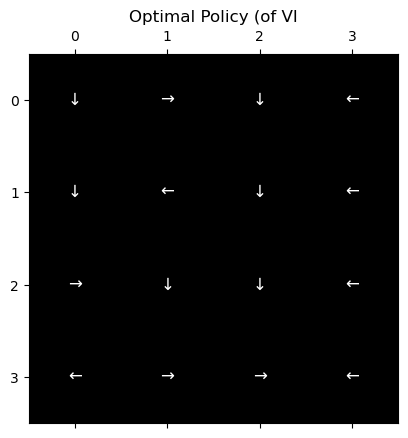

0
0

4

8

9

13

14



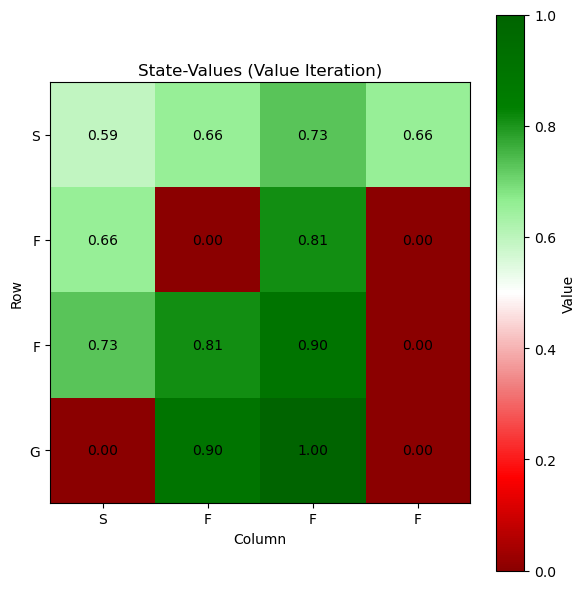

In [29]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import time
from matplotlib.colors import ListedColormap
# Value Iteration
cnvrge_steps_vi=np.zeros(6)
cnvrge_time_vi=np.zeros(6)
for i in range(6):
    value_iteration = ValueIteration(env, discount_factor=0.9)
    start=time.time()
    value_iteration.value_estimation()
    end=time.time()
    cnvrge_time_vi[i]=round(end-start,4)
    cnvrge_steps_vi[i]=value_iteration.get_step()

value_iteration = ValueIteration(env, discount_factor=0.9)
value_iteration.value_estimation()

optimal_policy_vi = np.array([value_iteration.get_optimal_policy(state) for state in range(env.observation_space.n)])
policy_grid = optimal_policy_vi.reshape(4, 4)

# Define the arrow symbols for visualization

arrow_symbols = {0: '←', 1: '↓', 2: '→', 3: '↑'}
policy_arrows = [arrow_symbols[action] for action in optimal_policy_vi]

# Create a 4x4 grid plot with arrows
fig, ax = plt.subplots()
ax.matshow(np.zeros((4, 4)), cmap='gray')

for i in range(4):
    for j in range(4):
        ax.text(j, i, policy_arrows[i*4 + j], ha='center', va='center', color='white', fontsize=12)

ax.set_title("Optimal Policy (of VI")
plt.show()




state = value_iteration.reset()
print (state)
done = False
values_vi = np.zeros((env.observation_space.n,))
while not done:
    print(state)
    action = optimal_policy_vi[state]
    state, reward, done = value_iteration.take_action(action)
    env.render()
    print("")
    values_vi[state] = reward


from matplotlib.colors import LinearSegmentedColormap


fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Get the state values from value_iteration
state_values_vi = value_iteration.get_state_values()

# Create a custom colormap with a smooth transition from green to red
cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=['#8B0000', 'red', 'lightcoral', 'white', 'lightgreen', 'green', '#006400']
)

# Display the chart with the custom colormap
im1 = ax.imshow(state_values_vi.reshape(4, 4), cmap=cmap)

# Add text annotations to the plot
for i in range(4):
    for j in range(4):
        text = ax.text(j, i, f'{state_values_vi.reshape(4, 4)[i, j]:.2f}', ha='center', va='center', color='black')


# im1 = ax[0].imshow(state_values_vi.reshape(4, 4), cmap='hot')
ax.set_title("State-Values (Value Iteration)")
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_xticklabels(['S', 'F', 'F', 'F'])
ax.set_yticklabels(['S', 'F', 'F', 'G'])
ax.set_xlabel("Column")
ax.set_ylabel("Row")

plt.colorbar(im1, ax=ax, label="Value")

plt.tight_layout()
plt.show()

<a name='1-3-2'></a>
#### Policy Iteration:

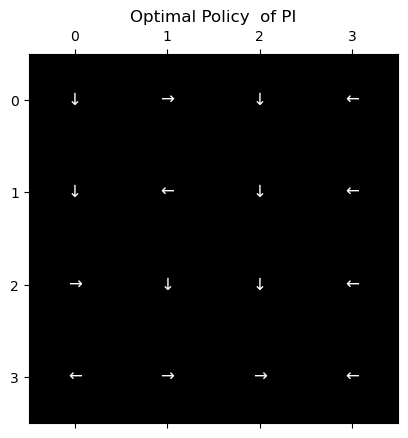

0








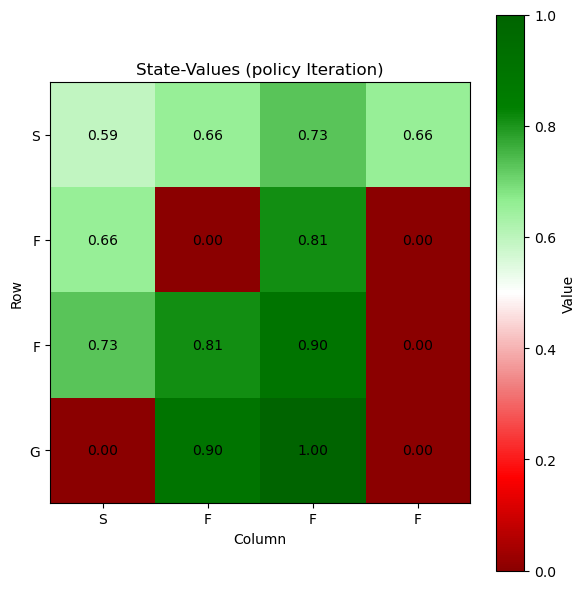

In [9]:
import matplotlib.pyplot as plt
from tabulate import tabulate
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import time
# Policy Iteration
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False , render_mode = "human" )
env.reset()
env.render()
discount_factor = 0.9
cnvrge_steps_pi=np.zeros(6)
cnvrge_time_pi=np.zeros(6)
for i in range(6):
    policy_iteration = PolicyIteration(env, discount_factor)
    start=time.time()
    policy_iteration.policy_estimation()
    end=time.time()
    cnvrge_time_pi[i]=round(end-start,4)
    cnvrge_steps_pi[i]=policy_iteration.get_step()



optimal_policy_pi = np.array([policy_iteration.get_optimal_policy(state) for state in range(env.observation_space.n)])
policy_grid = optimal_policy_pi.reshape(4, 4)

# Define the arrow symbols for visualization

arrow_symbols = {0: '←', 1: '↓', 2: '→', 3: '↑'}
policy_arrows = [arrow_symbols[action] for action in optimal_policy_vi]

# Create a 4x4 grid plot with arrows
fig, ax = plt.subplots()
ax.matshow(np.zeros((4, 4)), cmap='gray')

for i in range(4):
    for j in range(4):
        ax.text(j, i, policy_arrows[i*4 + j], ha='center', va='center', color='white', fontsize=12)

ax.set_title("Optimal Policy  of PI")
plt.show()


state = policy_iteration.reset()
print (state)
done = False
values_pi = np.zeros((env.observation_space.n,))
while not done:
    action = optimal_policy_pi[state]
    state, reward, done = policy_iteration.take_action(action)
    env.render()
    print("")
    values_pi[state] = reward



fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Get the state values from value_iteration
state_values_pi = value_iteration.get_state_values()

# Create a custom colormap with a smooth transition from green to red
cmap = LinearSegmentedColormap.from_list(
    name='custom_cmap',
    colors=['#8B0000', 'red', 'lightcoral', 'white', 'lightgreen', 'green', '#006400']
)

# Display the chart with the custom colormap
im = ax.imshow(state_values_vi.reshape(4, 4), cmap=cmap)

# Add text annotations to the plot
for i in range(4):
    for j in range(4):
        text = ax.text(j, i, f'{state_values_pi.reshape(4, 4)[i, j]:.2f}', ha='center', va='center', color='black')


# im1 = ax[0].imshow(state_values_vi.reshape(4, 4), cmap='hot')
ax.set_title("State-Values (policy Iteration)")
ax.set_xticks(np.arange(4))
ax.set_yticks(np.arange(4))
ax.set_xticklabels(['S', 'F', 'F', 'F'])
ax.set_yticklabels(['S', 'F', 'F', 'G'])
ax.set_xlabel("Column")
ax.set_ylabel("Row")

plt.colorbar(im1, ax=ax, label="Value")

plt.tight_layout()
plt.show()

<a name='1-4'></a>
### Question 6:

<a name='1-4-1'></a>
#### Value Iteration:

In [10]:
print(f"steps = {cnvrge_steps_vi} --- time = {cnvrge_time_vi} ")


steps = [141. 141. 141. 141. 141. 141.] --- time = [0.125  0.1191 0.1247 0.124  0.1332 0.1368] 


<a name='1-4-2'></a>
#### Policy Iteration:

In [11]:
print(f"steps = {cnvrge_steps_pi} --- time = {cnvrge_time_pi} ")


steps = [154. 155. 150. 153. 152. 153.] --- time = [0.062  0.0593 0.0553 0.0621 0.054  0.058 ] 


When comparing the convergence speed of the Value Iteration and Policy Iteration algorithms, it's important to consider that they have different convergence behaviors.

Value Iteration:

Value Iteration is known for its faster initial convergence compared to Policy Iteration.
In each iteration, Value Iteration updates the value function for all states simultaneously, considering the maximum expected value over all possible actions. This enables it to quickly propagate value updates throughout the state space.
The number of iterations required for Value Iteration to converge depends on the desired level of accuracy and the complexity of the MDP. However, it often converges in fewer iterations compared to Policy Iteration.
Policy Iteration:

Policy Iteration initially takes longer to converge compared to Value Iteration.
Policy Iteration consists of alternating between policy evaluation and policy improvement steps until convergence. The policy evaluation step often requires multiple iterations to accurately estimate the value function for a given policy.
However, Policy Iteration can converge in fewer total iterations than Value Iteration when the number of policy evaluation iterations is taken into account. It updates the policy after each evaluation step, potentially finding the optimal policy sooner.
In summary, Value Iteration has faster initial convergence, while Policy Iteration may take longer in the beginning due to multiple policy evaluation steps.

in totall, Policy Iteration can converge in fewer total iterations when considering both policy evaluation and policy improvement steps.

The choice between Value Iteration and Policy Iteration depends on the specific problem and the tradeoff between initial convergence speed and the number of total iterations required for convergence

<a name='2'></a>
## Part 2: Q-Learning Algorithm

In [12]:

REPS = 20
STUDENT_NUM = 272



In [13]:
# environment
env = gym.make('Taxi-v3')
#env.seed(seed = STUDENT_NUM)
Initial_State = env.reset(seed = STUDENT_NUM)

In [14]:
taxi_row, taxi_col, pass_idx, dest_idx = env.decode(Initial_State[0])
taxi_row, taxi_col, pass_idx, dest_idx

(2, 0, 3, 1)

In [15]:
# get familiar with the environment
print("you can see the environment in each step by render command :")
# env.render()


you can see the environment in each step by render command :


In [16]:
# Total no. of states
env.observation_space.n

500

In [17]:
# Total no. of actions
env.action_space.n

6

<a name='2-1'></a>
### Question 7:

# q - learning

Q-learning is a reinforcement learning algorithm used to find the optimal policy for an agent in an environment. It relies on Q-values, which represent the expected cumulative reward for taking a specific action in a given state. The algorithm iteratively updates these values using the Bellman equation until they converge to the optimal values. During the learning process, the agent balances exploration and exploitation to gather information about the environment and make optimal decisions. Q-learning is widely used in various domains such as robotics and game playing.
$${Q(s,a) = (1-\alpha)Q(s,a) + \alpha [\text{sample}] }$$
$${ \text{sample} = R(s,a,s') + \gamma \max_{a'} Q(s',a') }$$

Q-learning is based on the concept of Q-values. Q-values represent the expected cumulative reward an agent will receive by taking a particular action in a given state. The goal of Q-learning is to iteratively update the Q-values until they converge to the optimal values.

Here's a step-by-step explanation of how Q-learning works:

Initialization: Initialize the Q-values for all state-action pairs arbitrarily or to some predefined values.

Exploration vs. Exploitation: At each time step, the agent selects an action to take based on a tradeoff between exploration and exploitation. Initially, the agent tends to explore more to gather information about the environment.

Action selection: The agent selects an action to take based on an exploration strategy, such as epsilon-greedy, where it chooses a random action with probability epsilon, or selects the action with the highest Q-value for the current state with probability (1-epsilon).

Action execution and observation: The agent executes the selected action in the environment and observes the next state and the reward received.

Q-value update: The agent updates the Q-value for the current state-action pair using the Bellman equation. The Q-value for the current state-action pair is updated as a weighted sum of the immediate reward and the maximum expected future reward from the next state.

Repeat steps 3-5 until convergence or a predefined number of iterations.

Convergence: The Q-values are updated iteratively until they converge to the optimal values, ensuring that the agent has learned the optimal policy.

<a name='2-2'></a>
### Question 8:

In [18]:
EPISODES = 1000
EPSILON = 0.1
LEARNING_RATE = 0.1
# environment


class QLearningAgent():
    def __init__(self, env, epsilon, learning_rate, discount_factor, seed):
        self.env = env
        self.epsilon = epsilon
        self.learning_rate = learning_rate
        self.olr = learning_rate
        self.discount_factor = discount_factor
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
        self.seed = seed

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.choice(self.env.action_space.n)
        # Otherwise, choose the action with the highest Q-value
        else:
            print(self)
            action = np.argmax(self.q_table[state])
        return action

    def update_q_table(self, state, action, nextState, reward):
        # Calculate the new Q-value using the Q-learning formula
        
        sample = reward + self.discount_factor * np.max(self.q_table[nextState])
        alfa=self.learning_rate
        presentState_q =self.q_table[state][action]
        q_inTheNextState = (1 - alfa) * presentState_q + alfa * sample
        self.q_table[state][action] = q_inTheNextState
        
       
    def decay_epsilon(self, episode):
        # Decrease epsilon over episodes
        val_eps = (1 / (episode+1))**2
        self.epsilon =val_eps

        #self.epsilon = max(self.epsilon, 0.01)  # Ensure epsilon doesn't go below 0.01
    def decrease_learning_rate(self, episode):
        # Decrease learning rate over episodes
        temp = max(episode, 0.01) 
        self.learning_rate = self.learning_rate / (1 + temp * (LEARNING_RATE**2))

    def take_action(self, action):
        next_state, reward, done, _ = self.env.step(action)
        return next_state, reward, done

    def get_optimal_policy(self, state):
        return np.argmax(self.q_table[state])

    def get_q_values(self):
        return self.q_table

    def reset(self):
        # Reset the environment
        return self.env.reset(seed=self.seed)

In [19]:

REPS = 20
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 272

def my_q_run(env, agent, episodes, decay_lr=False):
    rewards = []
    for episode in range(episodes):
        total_reward = 0

        for i in range(100):
            state = agent.reset() 
            action = agent.choose_action(state)
            next_state, reward, done = agent.take_action(action)
            agent.update_q_table(state, action, next_state, reward)

            total_reward += reward
            if done:
                break

        rewards.append(total_reward)

        if decay_lr:
            
            agent.decrease_learning_rate(episode)
        agent.decay_epsilon(episode)
    return rewards


def draw_plot(rewards_learning_rate , rewards_decreasing_lr):
    episodes = range(EPISODES)

    plt.figure(figsize=(14, 8))
    plt.title('comparing plot')
    plt.plot(episodes, rewards_learning_rate, label='LR= 0.1')
    plt.plot(episodes, rewards_decreasing_lr, label='Decreasing LR')
    plt.xlabel('Epsde')
    plt.ylabel('Rwrd')
    #plt.legend(["const LR","decreasing LR"])
    plt.grid(True)
    #plt.xlim([0, 200])
    plt.show()


def implement():
    env = gym.make('Taxi-v3')

    epsilon = EPSILON
    discount_factor = DISCOUNT
    learning_rate = LEARNING_RATE

    # Run Q-Learning with a constant learning rate
    agent_constant_lr = QLearningAgent(env, epsilon=epsilon, learning_rate=learning_rate, discount_factor=discount_factor, seed=STUDENT_NUM)
    rewards_learning_rate = my_q_run(env, agent_constant_lr, EPISODES, decay_lr=False)

    # Run Q-Learning with decreasing learning rate
    agent_decreasing_lr = QLearningAgent(env, epsilon=epsilon, learning_rate=learning_rate, discount_factor=discount_factor, seed=STUDENT_NUM)
    rewards_decreasing_lr = my_q_run(env, agent_decreasing_lr, EPISODES, decay_lr=True)

    # Plot the convergence graphs
    draw_plot(rewards_learning_rate,rewards_decreasing_lr)

    # Compute the number of episodes needed to converge
    cnvrg_cnst_learning_rate = len(rewards_learning_rate) - 1
    print(f"learning rate = 0.1 ->> converge at:{cnvrg_cnst_learning_rate} " )
    cnvrg_decreasing_learning_rate = len(rewards_decreasing_lr) - 1   
    print(f"learning rate = decreasing ->> converge at:{cnvrg_decreasing_learning_rate} " )
    



implement()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


The less the learning rate in q-learning, the slower convergence during training.here,we met convergence so there is not much difference between two algorithm.

by the way, changing decreasing_LR , may have bad results
decreasing epsilon formula:
#  $\epsilon = initial\;\epsilon*(1-\frac{episode}{EPISODES})$

 epsilon --> changes between 0 and 0.1
 - It helps us to at higher episodes our agent choose action usualy on optimal policy instead of choose action randomly. 
 - The bigger the episode is, the smaller our epsilon is, the closer this gets to zero.


<a name='2-3'></a>
### Question 10:

In [209]:
import pygame
import time

def visualize_moves(rgb_array, frame_rate):
    frame_height, frame_width, _ = rgb_array.shape
    pygame.init()
    window = pygame.display.set_mode((frame_height, frame_width))
    clock = pygame.time.Clock()
    
    running = True
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
                break

        frame = pygame.surfarray.make_surface(rgb_array)
        frame = pygame.transform.rotate(frame, -90)
        frame = pygame.transform.flip(frame, True, False)
        window.blit(frame, (0, 0))
        pygame.display.flip()
        clock.tick(frame_rate)

    pygame.quit()
